# Data Science Technology and Systems
## Assignmnet 1- PART A
### Date: 26/09/2024
##### Name: Nidup Zangmo(u3257411)

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ast import literal_eval
# importin the geopandas library
import geopandas as gpd

### Importing and Understanding Data
##### In this section, I will import the dataset into the working environment and perform an initial analysis to understand its structure. This includes checking the size, data types, and identifying any missing values or anomalies. These steps are crucial to ensure the data is ready for further analysis.

In [21]:
# loading the dataset
data_filepath = "Desktop/UC/SEM 3/Data Science Technology/Assignment/data/zomato_df_final_data.csv"

# Create Panda Dataframe from the CSV file loaded
df = pd.read_csv(data_filepath)

# Printing first 5 rows of the Dataframe
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


### Exploratory Data Analysis
##### In this section, Exploratory Data Analysis (EDA) is conducted to gain insights into the dataset. Firstly, I have explored the data set by trying to understand the dataset.This will involve visualizing the distributions of numerical and categorical variables, identifying relationships between features, and detecting any outliers or anomalies. By using various statistical summaries and visualizations, I aim to uncover patterns and trends that will inform subsequent analyses and model development.

In [25]:
# Dimension of Dataframe
print (df.shape)

(10500, 17)


In [29]:
# Summary of Dataset
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [35]:
# Checking the column Names
print (df.columns)
print (df.dtypes)


Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')
address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


In [37]:
#Checking for duplicates
print (df.duplicated().sum())

1


In [43]:
#Checking for missing Values
missing_values = {}
labels = []

for col in df.columns:
    item = df[col].isna().sum()
    missing_values[col] = item
    labels.append(col)

# Printing the missing values for each column/feature
missing_values_df = pd.DataFrame(missing_values, index=[0])
for col in df.columns:
    print(f"{col}: {missing_values[col]} missing values")

address: 0 missing values
cost: 346 missing values
cuisine: 0 missing values
lat: 192 missing values
link: 0 missing values
lng: 192 missing values
phone: 0 missing values
rating_number: 3316 missing values
rating_text: 3316 missing values
subzone: 0 missing values
title: 0 missing values
type: 48 missing values
votes: 3316 missing values
groupon: 0 missing values
color: 0 missing values
cost_2: 346 missing values
cuisine_color: 0 missing values


In [45]:
# Checking varaibles data types 
data_types_summary = {
    'Categorical': df.select_dtypes(include=['object']).columns.tolist(),
    'Numerical': df.select_dtypes(include=['float64', 'int64']).columns.tolist(),
    'Boolean': df.select_dtypes(include=['bool']).columns.tolist()
}

for key, value in data_types_summary.items():
    print(f"Total {key} variables: {len(value)}")
    print(f"{key} variables are: {value}\n")


Total Categorical variables: 10
Categorical variables are: ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']

Total Numerical variables: 6
Numerical variables are: ['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2']

Total Boolean variables: 1
Boolean variables are: ['groupon']



In [51]:
#filter numerical variables 
numerical = df.select_dtypes(include='number')
print(numerical) 


        cost        lat         lng  rating_number   votes     cost_2
0       50.0 -33.876059  151.207605            4.0  1311.0   5.243902
1       80.0 -33.910999  151.193793            4.6  3236.0   7.560976
2      120.0 -33.867971  151.195210            4.9  1227.0  10.650407
3      270.0 -33.856784  151.215297            4.9   278.0  22.235772
4       55.0 -33.879035  151.206409            4.5  2150.0   5.630081
...      ...        ...         ...            ...     ...        ...
10495   40.0 -33.808653  150.972147            NaN     NaN   4.471545
10496   20.0 -33.922147  151.078400            NaN     NaN   2.926829
10497   20.0 -33.726993  150.725143            NaN     NaN   2.926829
10498   15.0 -33.766770  150.769962            NaN     NaN   2.540650
10499   60.0        NaN         NaN            NaN     NaN   6.016260

[10500 rows x 6 columns]


In [57]:

# Check for missing values directly in numerical columns
missing_values_numerical = df.select_dtypes(include='number').isnull().sum()

# Print the result
print(missing_values_numerical)


cost              346
lat               192
lng               192
rating_number    3316
votes            3316
cost_2            346
dtype: int64


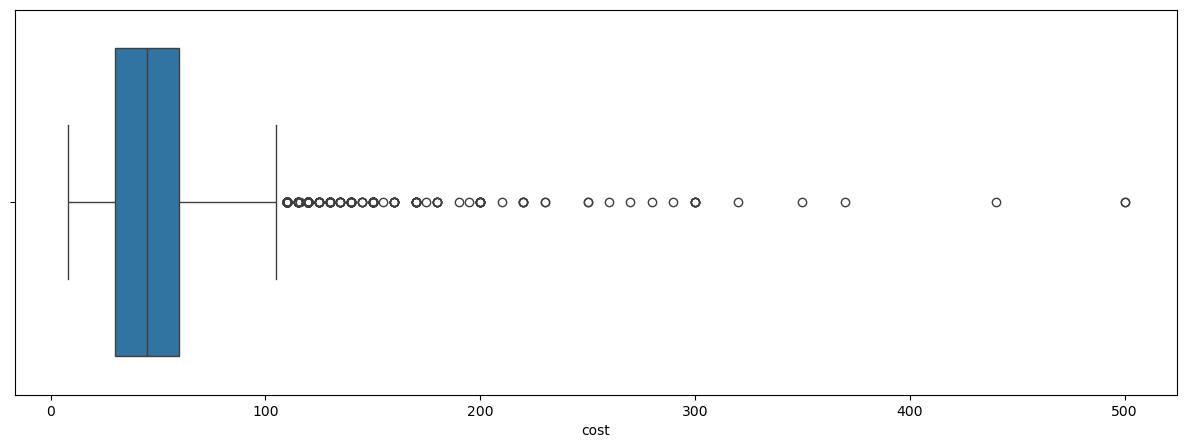

In [62]:
# Create a boxplot for the 'cost' column
plt.figure(figsize=(15, 5))

# Boxplot 
sns.boxplot(x='cost', data=df)

# Display the plot
plt.show()


##### The boxplot suggests that the cost data has a high degree of variability, with a small number of very high cost values.
##### The data is heavily skewed to the right, as indicated by the long whisker extending to the right. This means there are some very high cost values.

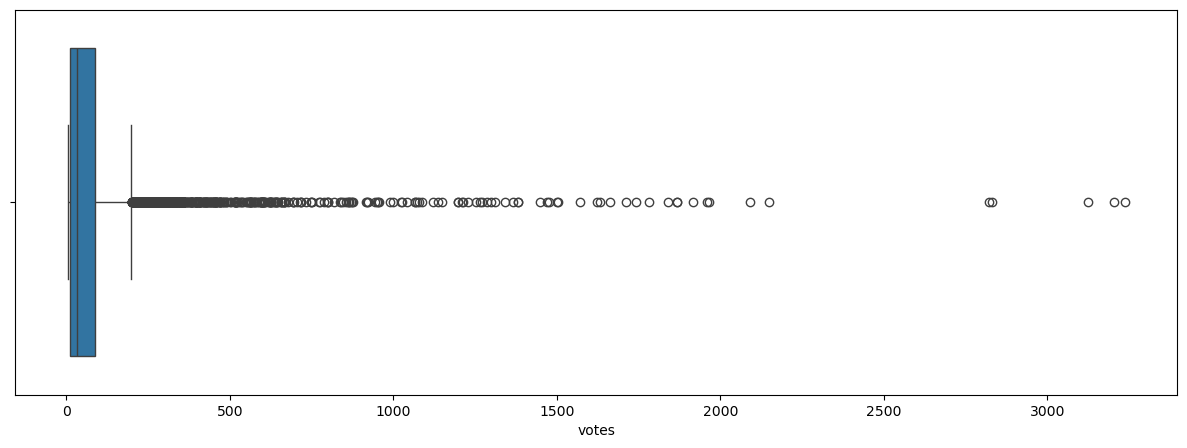

In [67]:
# creating boox plot for one more numerical variable 
#creating box plot for votes
# Boxplot for the 'votes' column
plt.figure(figsize=(15, 5))
sns.boxplot(x='votes', data=df, orient="h")

# Show the plot
plt.show()

##### The boxplot suggests that the vote data has a high degree of variability, with a small number of very high vote values.
##### Both plots (for cost and votes) show a heavily skewed distribution to the right, with a small number of very high values. The median values are also similar, with the first plot showing a median around 50 and the second plot showing a median around 500

In [70]:
# corelation matrix for the numerical variables
# Select the relevant numerical variables
numerical_vars = df[['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2']]

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()

# Display the correlation matrix
print(correlation_matrix)


                   cost       lat       lng  rating_number     votes    cost_2
cost           1.000000 -0.005393  0.007235       0.231050  0.270216  1.000000
lat           -0.005393  1.000000 -0.991335      -0.009038 -0.004452 -0.005393
lng            0.007235 -0.991335  1.000000       0.010438  0.006166  0.007235
rating_number  0.231050 -0.009038  0.010438       1.000000  0.534655  0.231050
votes          0.270216 -0.004452  0.006166       0.534655  1.000000  0.270216
cost_2         1.000000 -0.005393  0.007235       0.231050  0.270216  1.000000


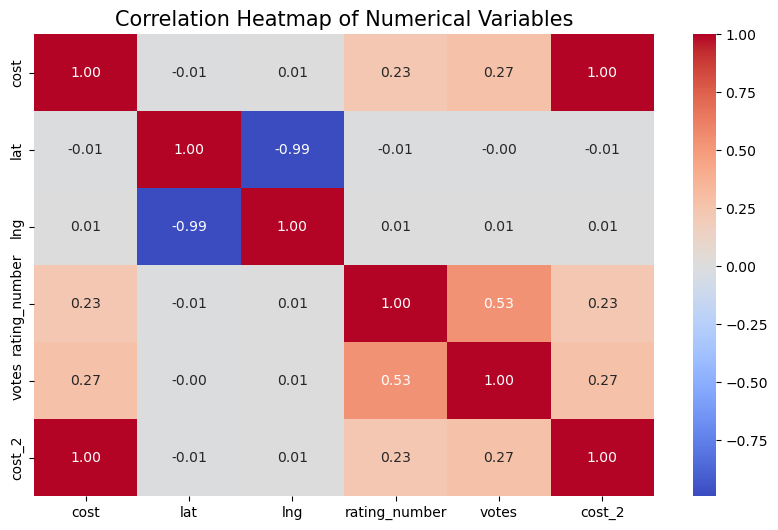

In [72]:

# Select the relevant numerical variables
numerical_vars = df[['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2']]

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with a colorbar
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')

# Set the title
plt.title("Correlation Heatmap of Numerical Variables", fontsize=15)

# Show the plot
plt.show()


##### There is a strong positive correlation between cost and cost_2, which suggests that these two variables are highly correlated. 
##### Most of the other variables have weak or no correlations with each other. This indicates that they are not strongly related.
##### There is a weak negative correlation between cost and lat, which suggests that as lat increases, cost tends to decrease slightly. However, this correlation is not very strong.

### Question 1: 
#### a. How many unique cuisines are served by Sydney restaurants?
##### There are 134 unique cuisines served by Sydney restaurants.

In [111]:
print(df['cuisine'])

0         ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']
1        ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']
2                                       ['Japanese']
3                              ['Modern Australian']
4                                  ['Thai', 'Salad']
                            ...                     
10495                                    ['Chinese']
10496                                  ['Beverages']
10497                                      ['Sushi']
10498                                      ['Sushi']
10499                                       ['Thai']
Name: cuisine, Length: 10500, dtype: object


In [113]:
print(df['cuisine'].apply(type))


0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
10495    <class 'str'>
10496    <class 'str'>
10497    <class 'str'>
10498    <class 'str'>
10499    <class 'str'>
Name: cuisine, Length: 10500, dtype: object


In [121]:
# Convert String values in cuisine column to list to use explode.
df = pd.read_csv(data_filepath)
df_cuisine = df['cuisine'].apply(literal_eval)

# Exploding the cuisine list and getting unique values
cuisine_list = df_cuisine.explode().unique()

print("Total number of unique cuisines are: ")
print(len(cuisine_list))

Total number of unique cuisines are: 
134


In [115]:
# Convert string values in the cuisine column to lists
df_cuisine = df['cuisine'].apply(literal_eval)

# Exploding the cuisine list into separate rows
exploded_cuisines = df_cuisine.explode()

# Getting unique values from the exploded cuisines
cuisine_list = exploded_cuisines.unique()

# Printing the total number of unique cuisines
print("Total number of unique cuisines are:", len(cuisine_list))

# Optionally, print the unique cuisines themselves
print("Unique cuisines are:", cuisine_list)

Total number of unique cuisines are: 134
Unique cuisines are: ['Hot Pot' 'Korean BBQ' 'BBQ' 'Korean' 'Cafe' 'Coffee and Tea' 'Salad'
 'Poké' 'Japanese' 'Modern Australian' 'Thai' 'Desserts' 'Cantonese'
 'Chinese' 'Yum Cha' 'Sushi' 'Ramen' 'Malaysian' 'Taiwanese' 'Seafood'
 'Asian' 'Italian' 'Steak' 'French' 'Singaporean' 'European' 'Mexican'
 'Bar Food' 'American' 'Burger' 'Lebanese' 'Bakery' 'Grill' 'Pizza'
 'Vietnamese' 'Cuban' 'Latin American' 'Irish' 'Healthy Food' 'Australian'
 'Fusion' 'Patisserie' 'Juices' 'Vegetarian' 'Japanese BBQ' 'Spanish'
 'Dumplings' 'Indonesian' 'Indian' 'Tapas' 'Turkish' 'Vegan' 'Shanghai'
 'Tea' 'Caribbean' 'Sandwich' 'Fast Food' 'Middle Eastern' 'German'
 'Mediterranean' 'Pho' 'Greek' 'Beverages' 'Kebab' 'Fish and Chips'
 'Moroccan' 'Pakistani' 'Sri Lankan' 'Pub Food' 'Contemporary' 'Teriyaki'
 'Meat Pie' 'British' 'Brasserie' 'Belgian' 'Austrian' 'Hungarian' 'Swiss'
 'Charcoal Chicken' 'Brazilian' 'African' 'Israeli' 'Sichuan'
 'Street Food' 'Portugue

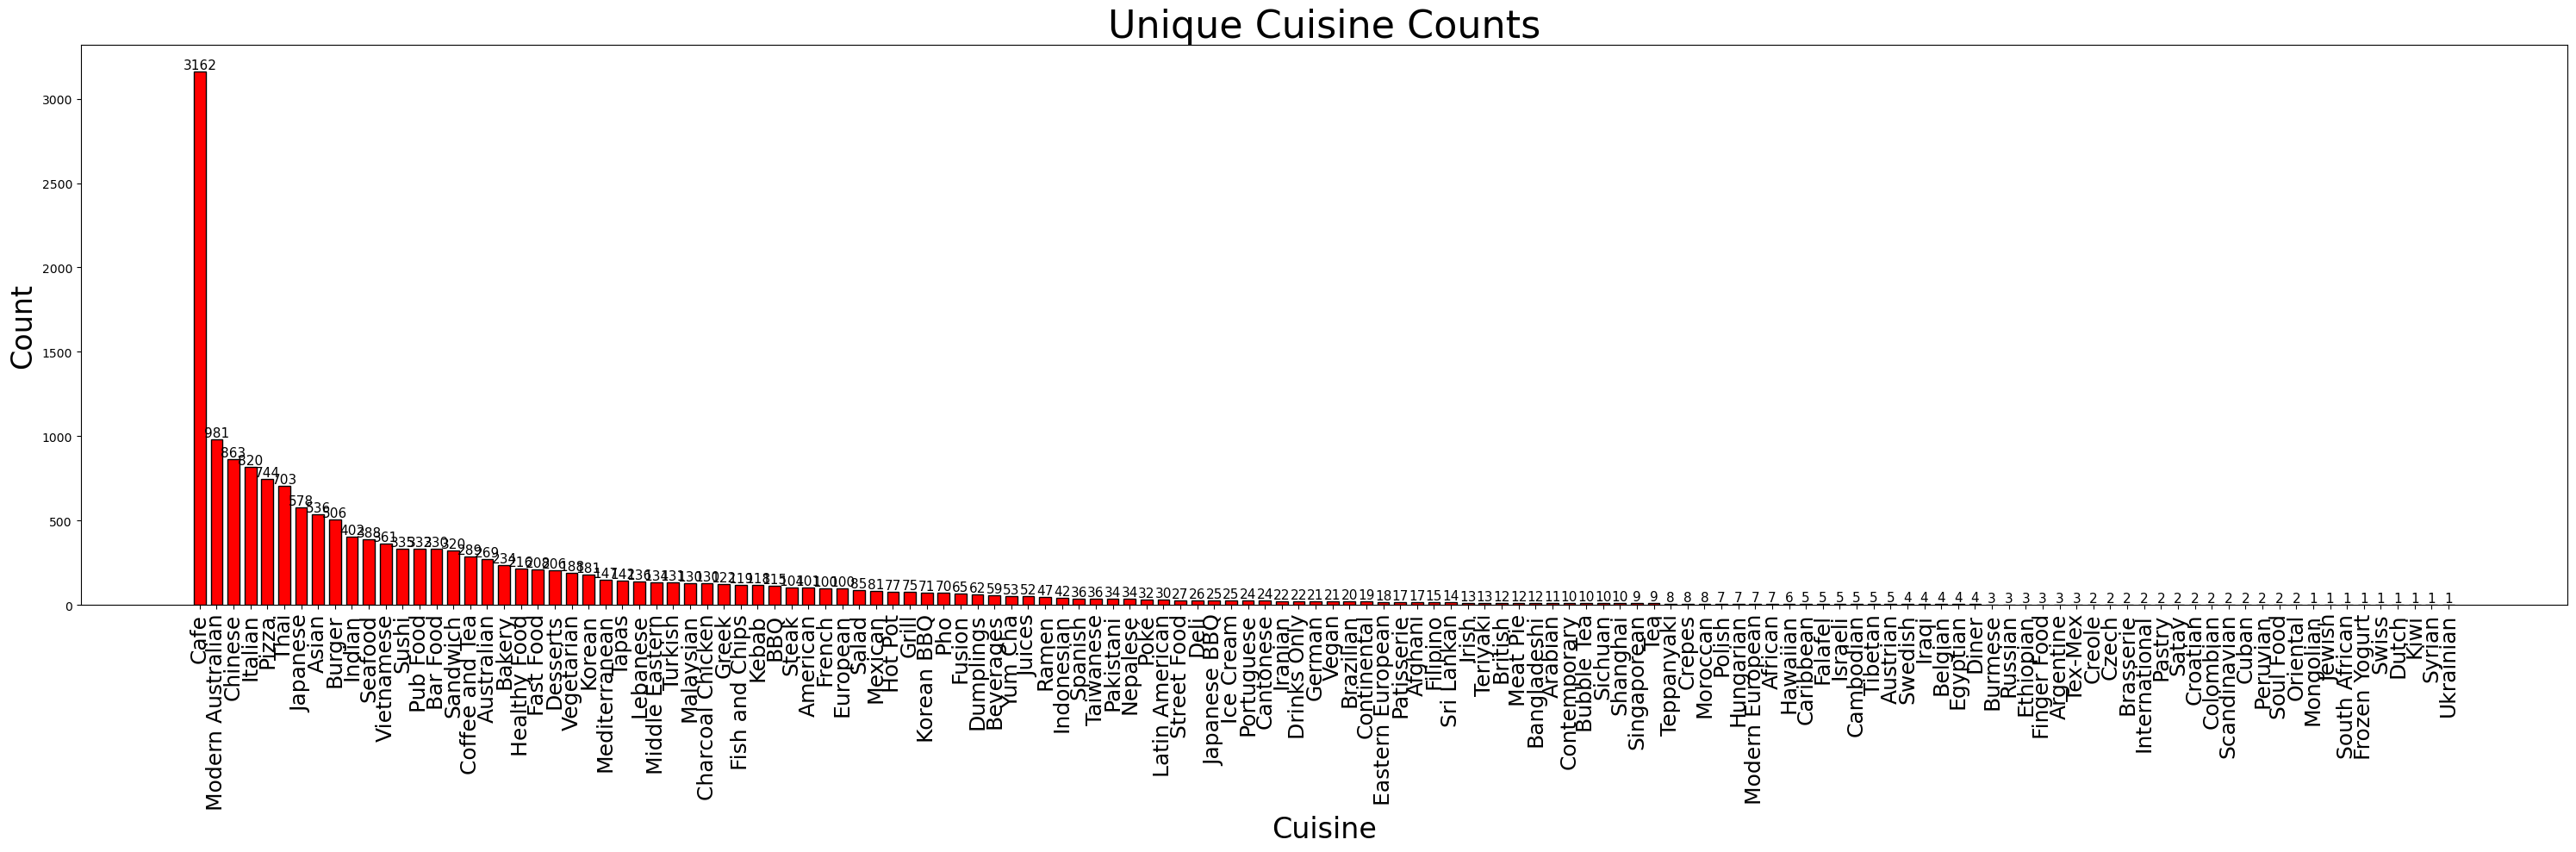

In [139]:
# Count the occurrences of each cuisine in the DataFrame
cuisine_counts = df_cuisine.explode().value_counts()

# Create a bar chart to visualize cuisine counts with customized bar colors
plt.figure(figsize=(30, 10))
bars = plt.bar(cuisine_counts.index, cuisine_counts.values,width=0.7, color='red', edgecolor='black')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=90, fontsize=18)  # Rotate x-axis labels for better visibility
plt.xlabel('Cuisine', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.title('Unique Cuisine Counts', fontsize=32)
plt.tight_layout()

# Show the plot
plt.show()





#### b. Which suburbs (top 3) have the highest number of restaurants?
##### The suburbs with highest restuarant is CBD followed by Surry Hills and Parramatta with restaurant counts as 476>260>225

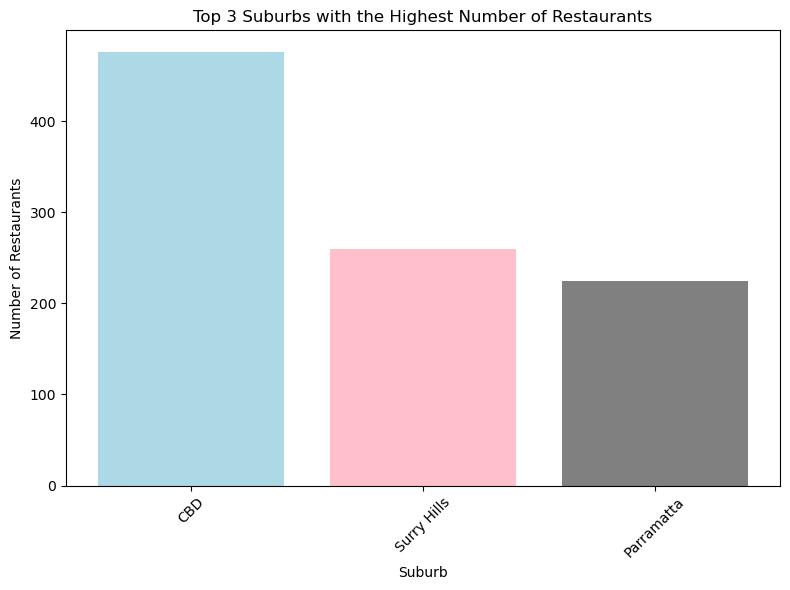

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


In [169]:

# Count restaurants by subzone
# Make sure to replace 'subzone' with the actual name of your subzone column in the DataFrame
subzone_counts = df['subzone'].value_counts()

# Select top 3 subzones with the highest number of restaurants
top_3_subzone = subzone_counts.head(3)

# Define colors for the bars
bar_colors = ['lightblue', 'pink', 'grey']

# Create a bar chart to visualize the counts
plt.figure(figsize=(8, 6))  
plt.bar(top_3_subzone.index, top_3_subzone.values, color=bar_colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.title('Top 3 Suburbs with the Highest Number of Restaurants')
plt.tight_layout()

# Show the plot
plt.show()
print (top_3_subzone)



#### c. Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive. 
##### Yes, the statement is correct. 

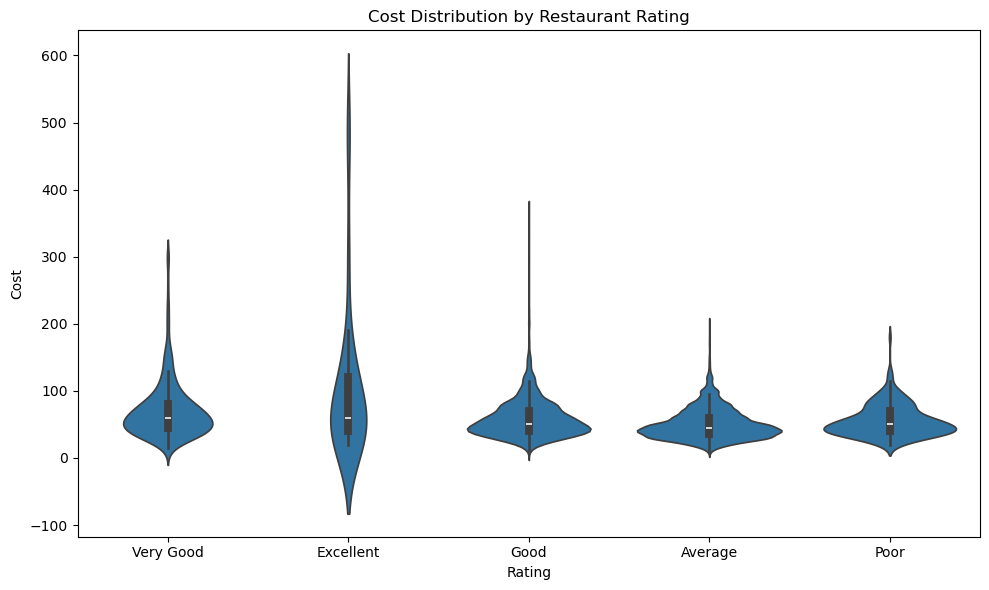

In [181]:
#creating violin plots  
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating_text', y='cost', data=df)

# Add titles and labels
plt.title('Cost Distribution by Restaurant Rating')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.tight_layout()

# Show the plot
plt.show()


##### Vilion plots also help us understand the the distribution of costs depending on rating.  The violin plots for "Very Good and Excellent ratings" are relatively tall and narrow, indicating that the costs for these restaurants are clustered around a specific value. The median cost for these categories appears to be higher than the median cost for other categories.
##### The violin plots for "Good and Average ratings"  are wider than the plots for "Very Good" and "Excellent", suggesting that the costs for these restaurants are more spread out. 
##### The violin plot for "Poor rating" is the widest of all, indicating that the costs for these restaurants vary widely. The median cost for this category appears to be the lowest among all categories.

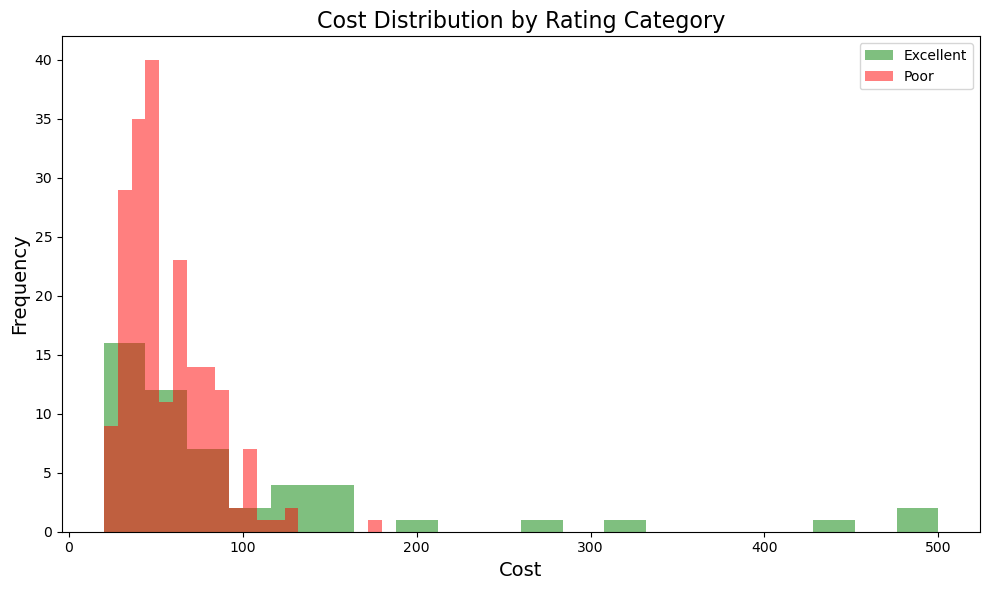

In [183]:
# Filter data based on rating categories
excellent_ratings = df[df['rating_text'] == 'Excellent']['cost']
poor_ratings = df[df['rating_text'] == 'Poor']['cost']

# Plot histogram
plt.figure(figsize=(10, 6))

# Histogram for Excellent rating
plt.hist(excellent_ratings, bins=20, alpha=0.5, label='Excellent', color='green')

# Histogram for Poor rating
plt.hist(poor_ratings, bins=20, alpha=0.5, label='Poor', color='red')

# Add titles and labels
plt.title('Cost Distribution by Rating Category', fontsize=16)
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

#####  This histogran shows that restaurants with "Excellent" ratings tend to have higher costs compared to those with "Poor" ratings, for instance cost 500 is denoted with green bars (i.e excellent ratings). However, the brown overlap shows that there are restaurants in the middle cost range that receive both "Excellent" and "Poor" ratings, suggesting that cost is not the only factor influencing ratings.


#####  Pivot table that shows the distribution of restaurant costs across different rating categories

In [200]:
# Counting the appeareance of  each cost under each rating_text
count = df.groupby(['rating_text', 'cost'])['cost'].count()
#grouped_count = df.groupby(['rating_text'])['cost'].count()
#grouped = grouped.T
print(count)


rating_text  cost 
Average      10.0      5
             12.0      1
             15.0     42
             16.0      1
             17.0      1
                      ..
Very Good    230.0     2
             250.0     1
             260.0     1
             280.0     1
             300.0     4
Name: cost, Length: 183, dtype: int64


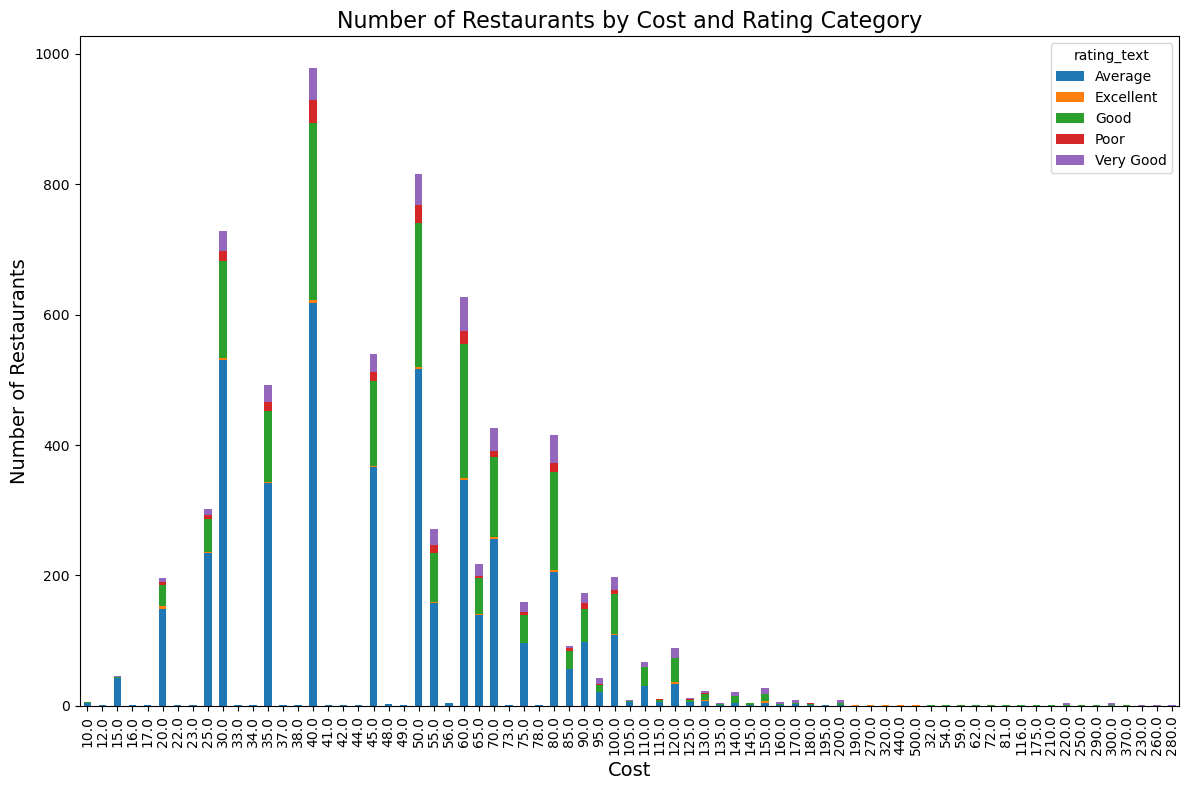

In [202]:
# Counting the appearance of each cost under each rating_text
count = df.groupby(['rating_text', 'cost'])['cost'].count()

# Unstack to create a pivot-like table
pivot_count = count.unstack().fillna(0)

# Plot the data using a bar plot (stacked for better comparison)
pivot_count.T.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Number of Restaurants by Cost and Rating Category', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


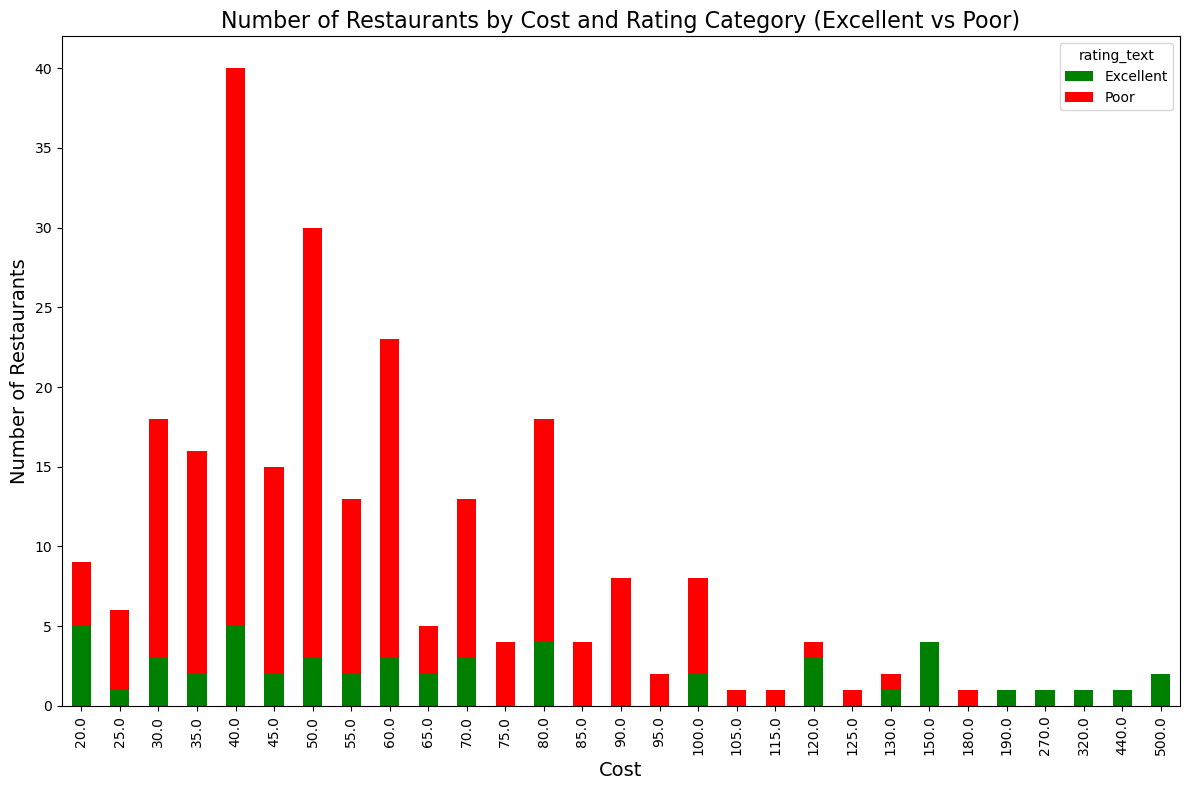

In [204]:
import matplotlib.pyplot as plt

# Filter for Excellent and Poor ratings
ratings_of_interest = ['Excellent', 'Poor']
df_filtered = df[df['rating_text'].isin(ratings_of_interest)]

# Count the appearance of each cost under each rating_text
count = df_filtered.groupby(['rating_text', 'cost'])['cost'].count()

# Unstack to create a pivot-like table
pivot_count = count.unstack().fillna(0)

# Plot the data using a stacked bar plot
pivot_count.T.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'red'])

# Add labels and title
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.title('Number of Restaurants by Cost and Rating Category (Excellent vs Poor)', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


##### Based on the above plots, I believe there's a strong correlation between restaurant ratings and cost. Generally, restaurants with 'Excellent' and 'Very Good' ratings tend to be pricier, while those with 'Poor' ratings are often more affordable. However, there are exceptions, suggesting other factors like location or cuisine might also influence pricing.The violin plots and histograms reveal interesting trends. 'Excellent' and 'Very Good' rated restaurants often have a narrower range of prices, suggesting more consistent pricing. On the other hand, 'Poor' rated restaurants can vary widely in cost, indicating a less predictable pricing structure.

##### Overall, while higher ratings typically mean higher prices, it's not always a straightforward relationship. Factors beyond the rating itself likely play a role in determining a restaurant's cost.

### Question 2: Exploratory Analaysis


#### Exploratory analysis for cost variable

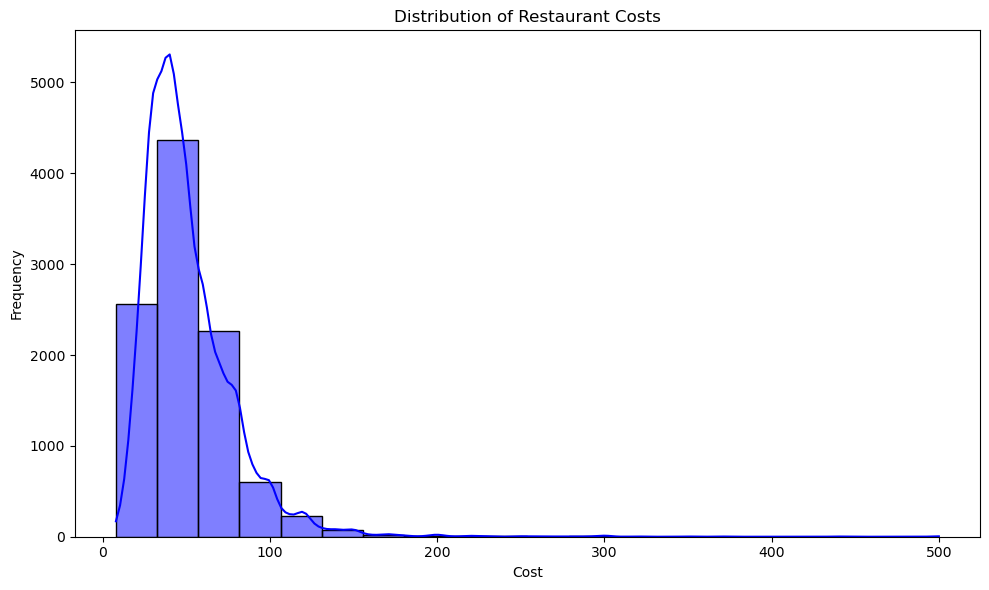

Descriptive Statistics for 'Cost':
 count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


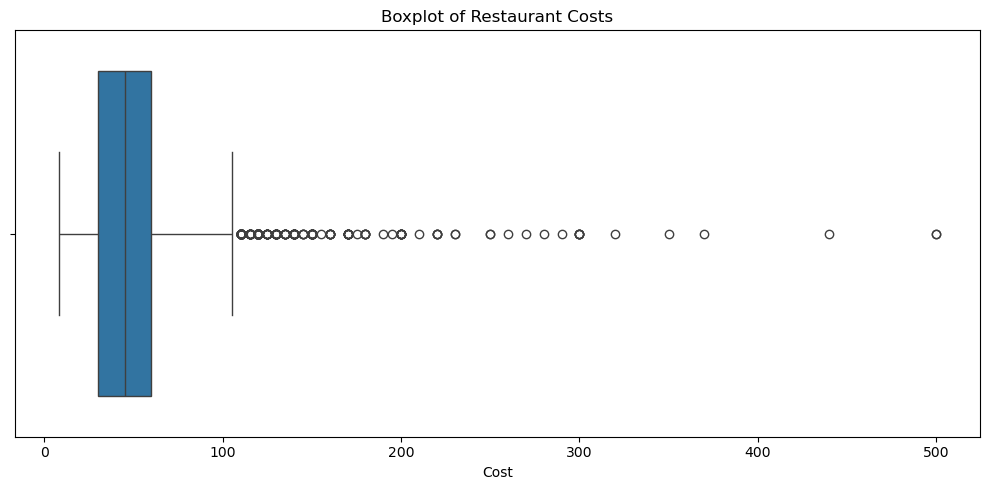

In [213]:
# 1. Histogram of 'Cost'
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], kde=True, bins=20, color='blue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Descriptive statistics for 'Cost'
cost_desc = df['cost'].describe()
print("Descriptive Statistics for 'Cost':\n", cost_desc)

# 3. Boxplot for 'Cost' (Outlier detection)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cost'])
plt.title('Boxplot of Restaurant Costs')
plt.xlabel('Cost')
plt.tight_layout()
plt.show()

#### Exploratory analysis for rating variable

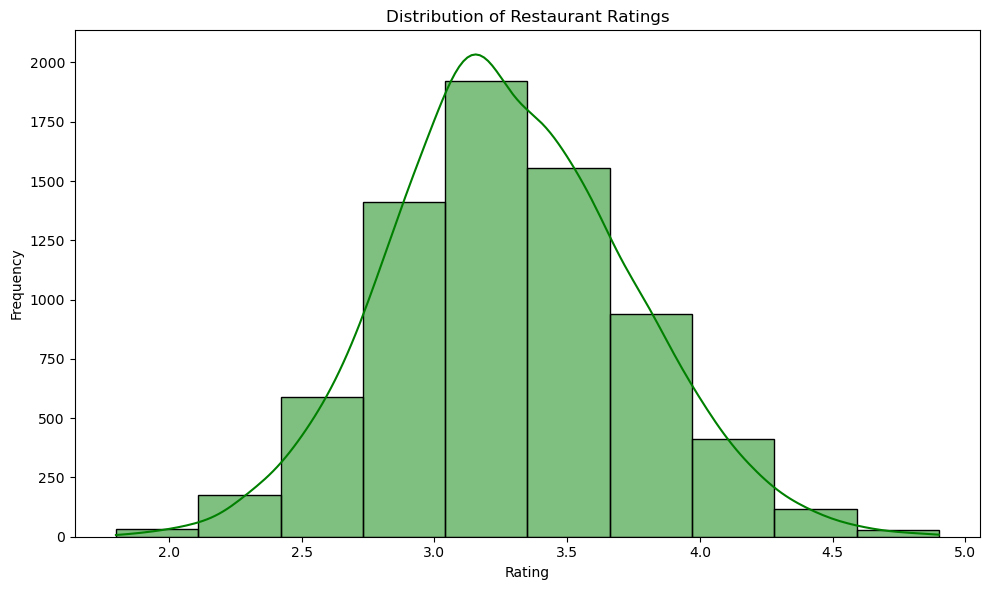

Descriptive Statistics for 'Rating':
 count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [236]:
# 1. Histogram of 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], kde=True, bins=10, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Descriptive statistics for 'Rating'
rating_desc = df['rating_number'].describe()
print("Descriptive Statistics for 'Rating':\n", rating_desc)




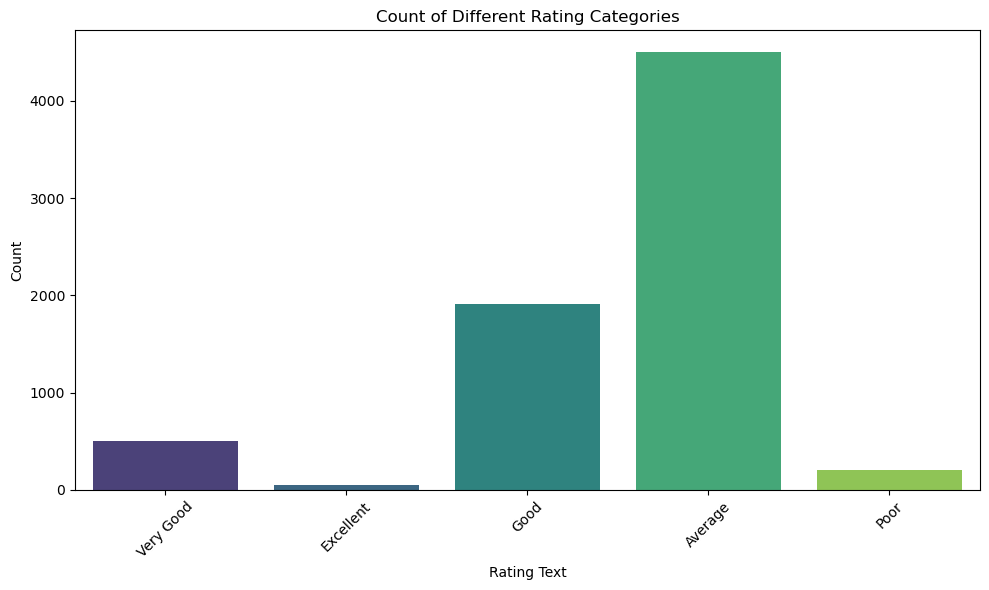

In [242]:
# Bar plot for Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating_text', data=df, hue='rating_text', palette='viridis', legend=False)
plt.title('Count of Different Rating Categories')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Exploratory Analysis for Type variable

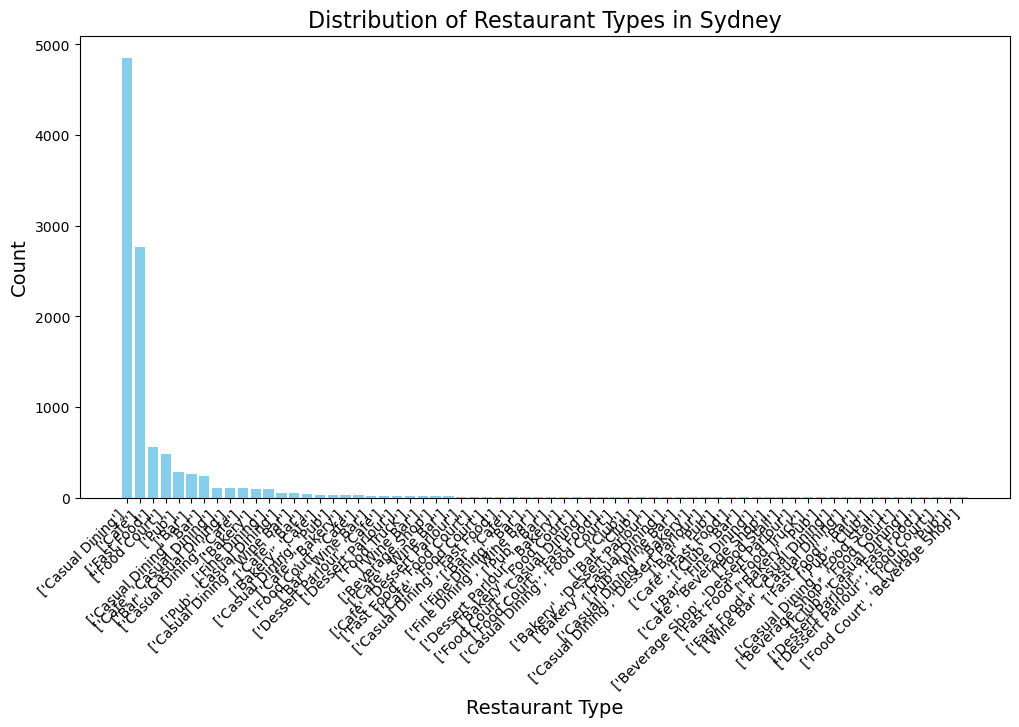

In [571]:
import matplotlib.pyplot as plt

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(type_counts.index, type_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align right
plt.xlabel('Restaurant Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Restaurant Types in Sydney', fontsize=16)

# Show the plot
plt.show()

In [254]:
# Filling nan values with "Unknown"
restaurants = df['type'].fillna("['Unknown']", inplace=False)

# Converting String to list
df_res = restaurants.apply(literal_eval)

# Exploding the list
res_list = df_res.explode().unique()

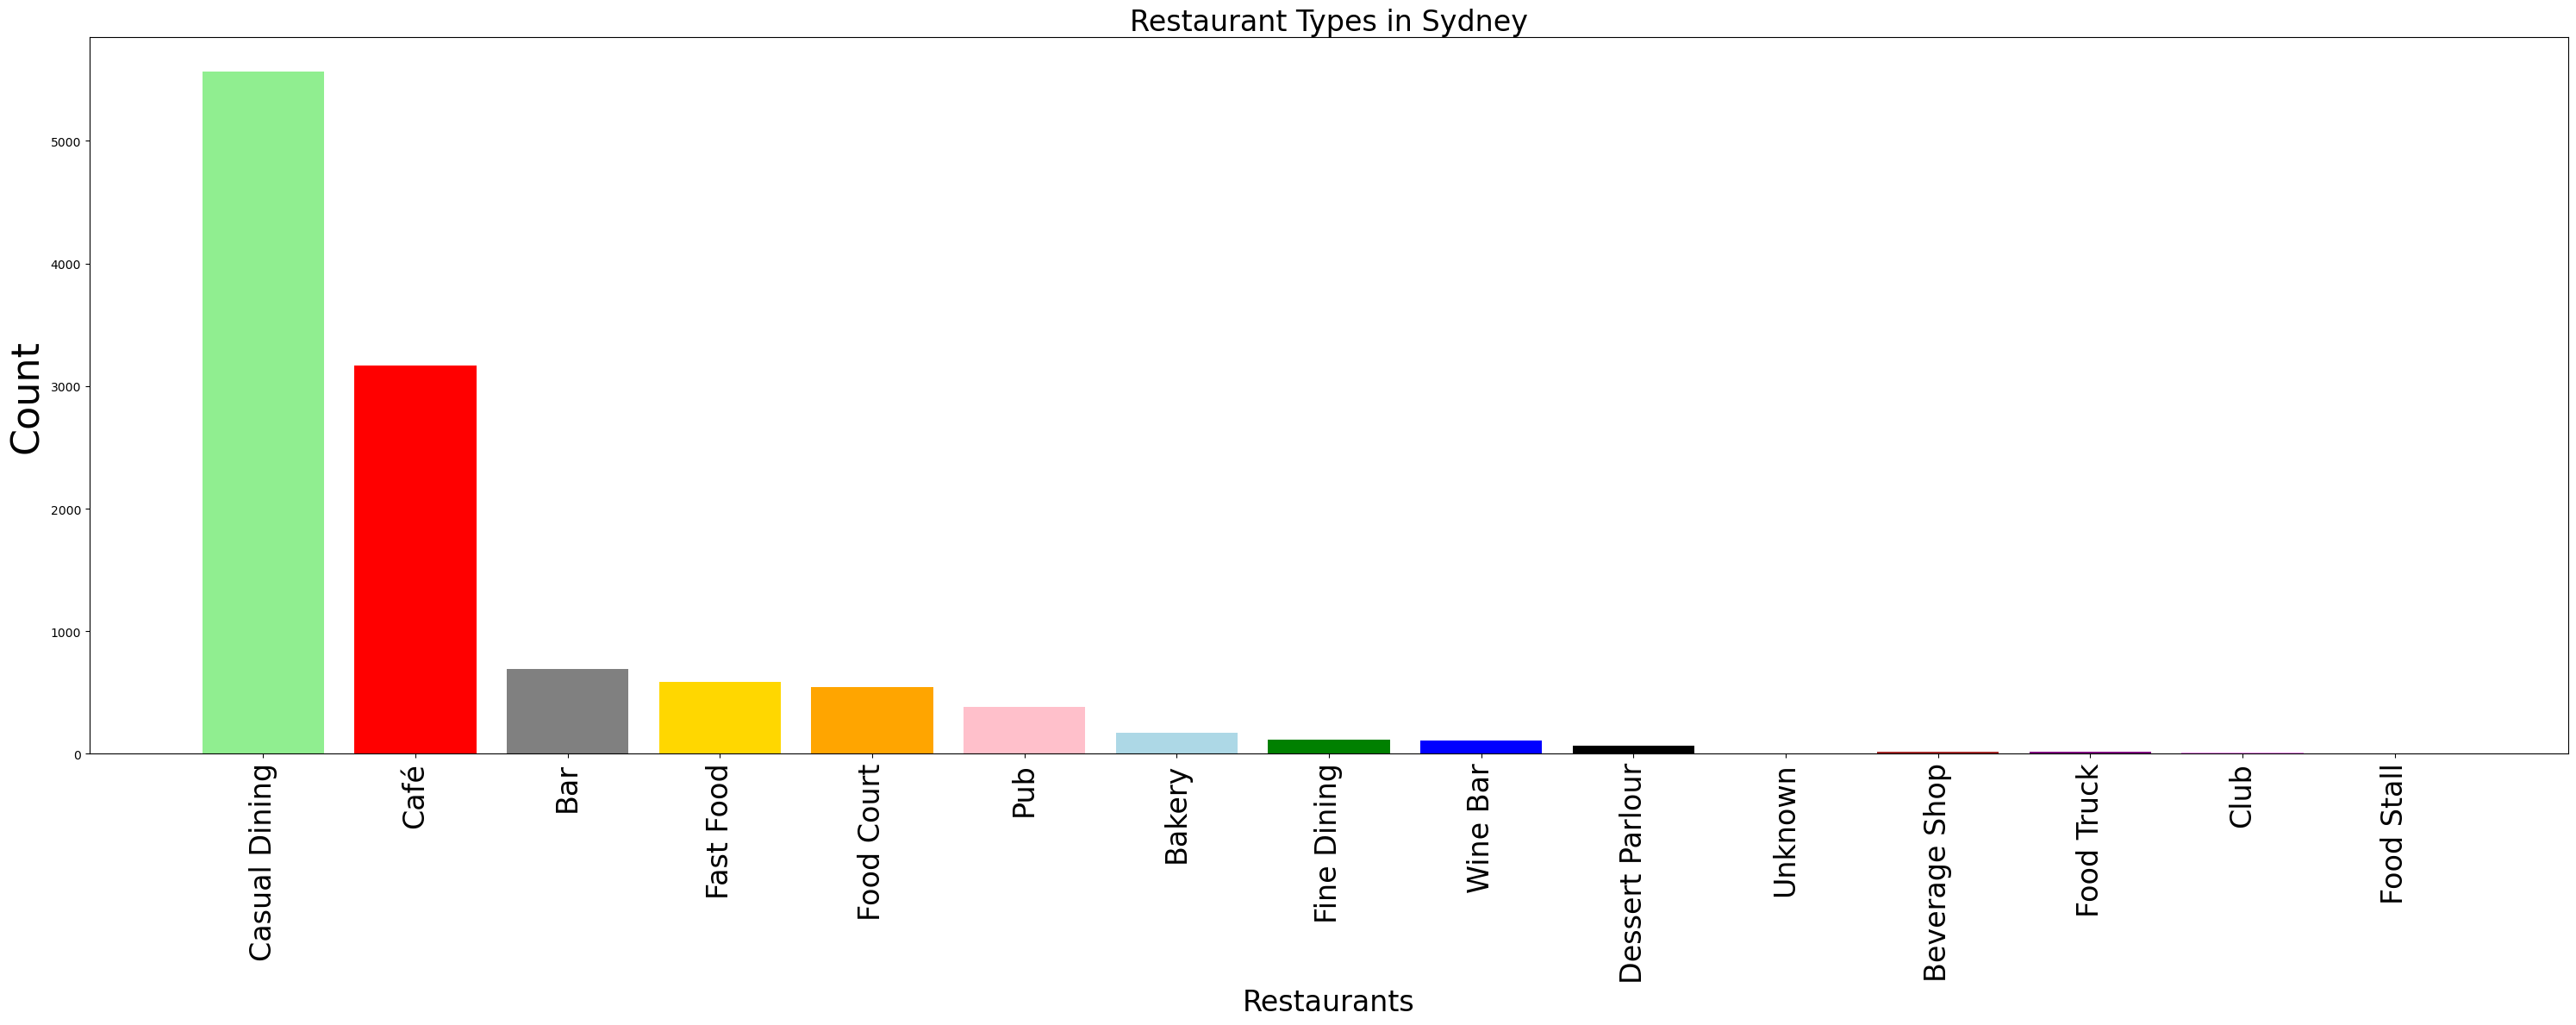

In [302]:
# Count the occurrences of each cuisine in the DataFrame
res_counts = df_res.explode().value_counts()

colors = ["lightgreen","red","grey","gold","orange","pink","lightblue","green","blue","black","white",
          "brown","purple","violet","lightpink"]

plt.figure(figsize=(30, 12))
plt.bar(res_counts.index, res_counts.values, color=colors)
plt.xticks(rotation=90, fontsize=24)  # Rotate x-axis labels for better visibility
plt.xlabel('Restaurants', fontsize= 24)
plt.ylabel('Count', fontsize=32)
plt.title('Restaurant Types in Sydney', fontsize=24)
plt.tight_layout()

# Show the plot
plt.show()


##### Here are some key observations from the chart:

##### 1. Casual Dining is the most common restaurant type, followed by Café.
##### 2. Bar, Fast Food, and Food Court are also relatively common.
##### 3. Bakery, Fine Dining, Wine Bar, Dessert Parlour, Unknown, Beverage Shop, Food Truck, Club, and Food Stall are less common.

In [362]:
# Get descriptive statistics for the DataFrame
descriptive_stats = df_res.describe()
print (descriptive_stats)


count               10500
unique                 67
top       [Casual Dining]
freq                 4854
Name: type, dtype: object


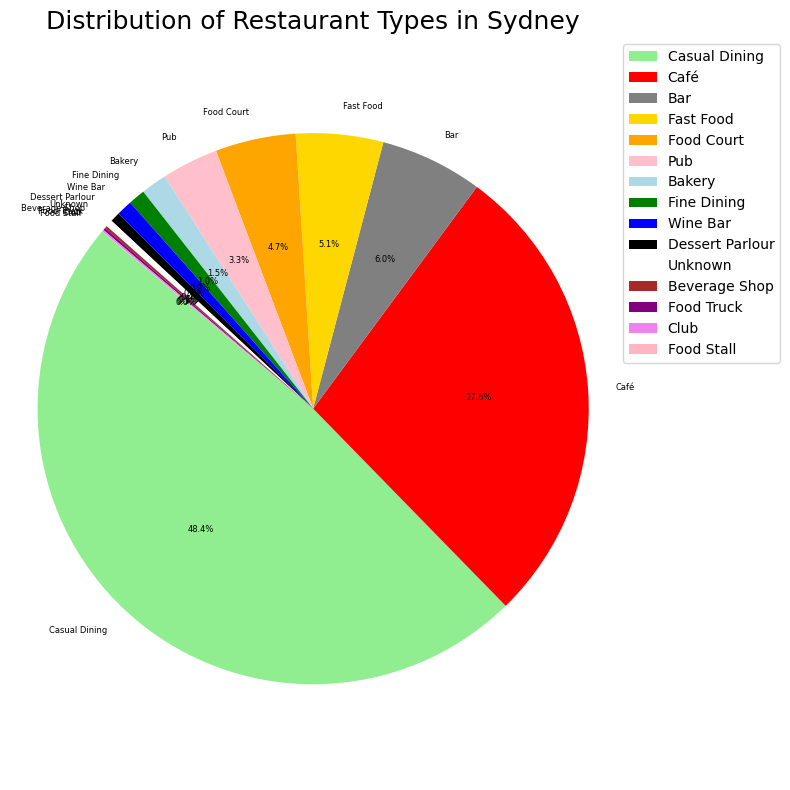

In [398]:
import matplotlib.pyplot as plt

# Count occurrences
res_counts = df_res.explode().value_counts()

# Improved colors (consider adjusting based on your preference)
colors = ["lightgreen","red","grey","gold","orange","pink","lightblue","green","blue","black","white",
          "brown","purple","violet","lightpink"]

# Create pie chart
plt.figure(figsize=(8, 8))  # Slightly larger figure for better spacing
plt.pie(res_counts, labels=res_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize':6}) 

# Increase font size for title and labels
plt.title('Distribution of Restaurant Types in Sydney', fontsize=18)
plt.xticks(fontsize=3) 
plt.yticks(fontsize=3)  

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Add a legend
plt.legend(res_counts.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Adjust position if needed

# Improve spacing with tight_layout
plt.tight_layout()

# Show the plot
plt.show()

### Question 3: Produce Cuisine Density Maps


In [421]:
#import the file 
geojson_path = "Desktop/UC/SEM 3/Data Science Technology/Assignment/data/sydney.geojson"
sydney_suburbs = gpd.read_file(geojson_path)

In [427]:
print(sydney_suburbs.info()) 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SSC_CODE    494 non-null    object  
 1   SSC_NAME    494 non-null    object  
 2   CONF_VALUE  494 non-null    object  
 3   SQKM        476 non-null    float64 
 4   geometry    471 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 19.4+ KB
None


In [429]:
print (sydney_suburbs. head())

  SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84 -34.07817, 150.84077 -34.078,...  
4  POLYGON ((151.18603 -33.9166, 151.18562 -33.91...  


<Axes: >

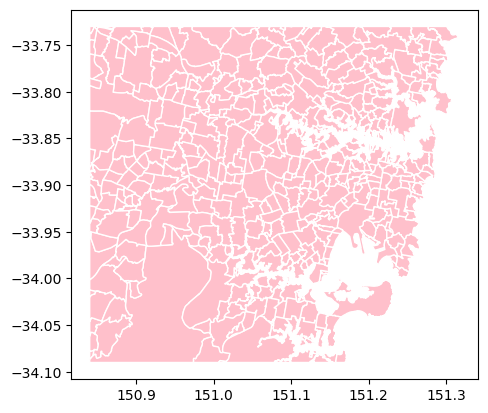

In [444]:
#Testing the maps
sydney_suburbs.to_crs(epsg=4326).plot(color="pink", edgecolor="white")

In [436]:
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lng'], df['lat']), crs="EPSG:4326")
geo_df


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b,POINT (151.2076 -33.87606)
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b,POINT (151.19379 -33.911)
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b,POINT (151.19521 -33.86797)
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4,POINT (151.2153 -33.85678)
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b,POINT (151.20641 -33.87904)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,"40 Station Street, Wentworthville, Parramatta...",40.0,['Chinese'],-33.808653,https://www.zomato.com/sydney/cozy-resturant-p...,150.972147,02 9636 3502,NaN,NaN,Parramatta,Cozy Resturant,['Casual Dining'],NaN,False,#000000,4.471545,#f45042,POINT (150.97215 -33.80865)
10496,"143 Haldon Street, Lakemba, Sydney",20.0,['Beverages'],-33.922147,https://www.zomato.com/sydney/lakemba-hotel-la...,151.078400,Not available for this place,NaN,NaN,Lakemba,Lakemba Hotel,['Bar'],NaN,False,#000000,2.926829,#6f706b,POINT (151.0784 -33.92215)
10497,"Jordan Springs Woolworths Shopping Centre, Jo...",20.0,['Sushi'],-33.726993,https://www.zomato.com/sydney/sushi-yogho-penrith,150.725143,Not available for this place,NaN,NaN,Penrith,Sushi Yogho,['Food Court'],NaN,False,#000000,2.926829,#6f706b,POINT (150.72514 -33.72699)
10498,"St Mary's Village, Charles Hackett Drive, St ...",15.0,['Sushi'],-33.766770,https://www.zomato.com/sydney/kota-sushi-1-st-...,150.769962,0416 888 777,NaN,NaN,St Marys,Kota Sushi,['Food Court'],NaN,False,#000000,2.540650,#6f706b,POINT (150.76996 -33.76677)


In [486]:

joined=sydney_suburbs.sjoin(geo_df, how="inner", predicate="intersects")
joined.head()

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry,index_right,address,cost,cuisine,lat,...,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8...",2697,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130.0,"['Italian', 'Pizza', 'Tapas']",-33.881260,...,3.3,Average,Bonnyrigg,Amoretti's,['Casual Dining'],65.0,False,#fd9243,11.422764,#6f706b
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8...",6411,"Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...",78.0,"['Italian', 'Pizza']",-33.869781,...,3.0,Average,Bonnyrigg,8 Slices Pizzaria,['Casual Dining'],18.0,False,#fdab66,7.406504,#6f706b
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",3099,"378 Great North Road, Abbotsford, Sydney",70.0,"['Latin American', 'Fusion']",-33.850952,...,3.3,Average,Abbotsford,The Cove Dining Co,['Casual Dining'],19.0,False,#fd9243,6.788618,#6f706b
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",7143,"547 Great North Road, Abbotsford, Sydney",45.0,"['Pizza', 'Italian']",-33.848228,...,NaN,NaN,Abbotsford,Charley's Pizzeria,['Fast Food'],NaN,False,#000000,4.857724,#6f706b
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",4265,"557 Great North Road, Abbotsford, Sydney",50.0,['Thai'],-33.847773,...,3.6,Good,Abbotsford,Cinnamon Thai Cuisine,['Casual Dining'],54.0,False,#f57622,5.243902,#6f706b


In [492]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_cuisine_density_map(restaurant_df, cuisine, geojson_path):
    # Load Sydney suburbs GeoJSON
    sydney_suburbs = gpd.read_file(geojson_path)
    
    # Step 1: Create a GeoDataFrame from the restaurant data
    geo_restaurants = gpd.GeoDataFrame(
        restaurant_df, 
        geometry=gpd.points_from_xy(restaurant_df['lng'], restaurant_df['lat']),
        crs="EPSG:4326"
    )

    # Step 2: Filter restaurants that serve the specified cuisine
    cuisine_restaurants = geo_restaurants[geo_restaurants['cuisine'] == cuisine]

    # Step 3: Spatial join to count restaurants per suburb
    # This joins the restaurant points to the suburb polygons
    counts = gpd.sjoin(cuisine_restaurants, sydney_suburbs, op='within')

    # Step 4: Aggregate counts by suburb
    cuisine_count = counts.groupby('index_right').size().reset_index(name='restaurant_count')

    # Merge counts back to the suburb GeoDataFrame
    sydney_suburbs = sydney_suburbs.merge(cuisine_count, left_index=True, right_on='index_right', how='left')

    # Fill NaN values with 0 (for suburbs with no restaurants of that cuisine)
    sydney_suburbs['restaurant_count'] = sydney_suburbs['restaurant_count'].fillna(0)

    # Step 5: Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sydney_suburbs.plot(column='restaurant_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add titles and labels
    plt.title(f'Density of {cuisine} Restaurants in Sydney', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)

    plt.show()

In [506]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_cuisine_density_map(restaurant_df, cuisine, geojson_path):
    # Load Sydney suburbs GeoJSON
    sydney_suburbs = gpd.read_file(geojson_path)
    
    # Step 1: Create a GeoDataFrame from the restaurant data
    geo_restaurants = gpd.GeoDataFrame(
        restaurant_df, 
        geometry=gpd.points_from_xy(restaurant_df['lng'], restaurant_df['lat']),
        crs="EPSG:4326"
    )

    # Step 2: Filter restaurants that serve the specified cuisine
    cuisine_restaurants = geo_restaurants[geo_restaurants['cuisine'] == cuisine]

    # Step 3: Spatial join to count restaurants per suburb
    counts = gpd.sjoin(cuisine_restaurants, sydney_suburbs, op='within')

    # Step 4: Aggregate counts by suburb
    cuisine_count = counts.groupby('index_right').size().reset_index(name='restaurant_count')

    # Merge counts back to the suburb GeoDataFrame
    sydney_suburbs = sydney_suburbs.merge(cuisine_count, left_index=True, right_on='index_right', how='left')

    # Fill NaN values with 0 (for suburbs with no restaurants of that cuisine)
    sydney_suburbs['restaurant_count'] = sydney_suburbs['restaurant_count'].fillna(0)

    # Step 5: Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sydney_suburbs.plot(column='restaurant_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add titles and labels
    plt.title(f'Density of {cuisine} Restaurants in Sydney', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)

    # Show the plot
    plt.tight_layout()  # Adjusts plot to ensure everything fits
    plt.show()

# Function to print the Suburb List that serves the given cuisine
def display_suburbs(cuisine):
    # Creating empty list to store the 
    suburbs_list = []
    for i, row in joined.iterrows():
            if cuisine in str(row['cuisine']):
                suburbs_list.append(row['SSC_NAME'])
    unique_suburbs = set(suburbs_list)
    count = len(unique_suburbs)

    suburb_df = pd.DataFrame(suburbs_list)
    print(suburb_df.value_counts())

In [530]:
# Get user input for the suburbs containing that cuisine
cuisine_type = input("Enter Country to search for cuisines served in suburbs (e.g. American):\n").title()

Enter Country to search for cuisines served in suburbs (e.g. American):
 Italian


#### Another way: Using Show cuisine density map

In [1]:
# Creating a new dataframe
def show_cuisine_densitymap(cuisine):
    # Create a list to store the suburbs that serve the given cuisine
    suburbs_to_color = []
    
    # Iterate through the geodata_frame to get the suburbs that serve the given cuisine
    for i, row in joined.iterrows():
        #print(type(row['cuisine']))
        if cuisine in str(row['cuisine']):
            suburbs_to_color.append(row['SSC_NAME'])
            
    unique_suburbs = set(suburbs_to_color)
    count = len(unique_suburbs)
    print(f"Total suburbs that serve {cuisine} cuisines: {count}")

    # Filter the GeoDataFrame to get the geometry of the specified suburb
    fig, ax = plt.subplots(1, 1, figsize=(8, 20))
    sydney_suburbs.plot(ax=ax, color='pink', edgecolor='black', legend=True)
    for sub in suburbs_to_color:
        # Filter the sydney_suburbs DataFrame to get the geometry of the specified suburb from the list above
        suburb_geometry = sydney_suburbs[sydney_suburbs['SSC_NAME']==sub]
        suburb_geometry.plot(ax=ax, color="blue", alpha=0.3)

    
   # Set the axis labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Sydney Suburbs with {cuisine} Cuisines')
    plt.tight_layout()

    
    # Show the plot
    plt.show()

# Function to print the Suburb List that serves the given cuisine
def display_suburbs(cuisine):
    # Creating empty list to store the 
    suburbs_list = []
    for i, row in joined.iterrows():
            if cuisine in str(row['cuisine']):
                suburbs_list.append(row['SSC_NAME'])
    unique_suburbs = set(suburbs_list)
    count = len(unique_suburbs)

    suburb_df = pd.DataFrame(suburbs_list)
    print(suburb_df.value_counts())

In [548]:
# Get user input for the suburbs containing that cuisine
cuisine_type = input("Enter Country to search for cuisines served in suburbs (e.g. American):\n").title()

Enter Country to search for cuisines served in suburbs (e.g. American):
 Italian


Total suburbs that serve Italian cuisines: 231


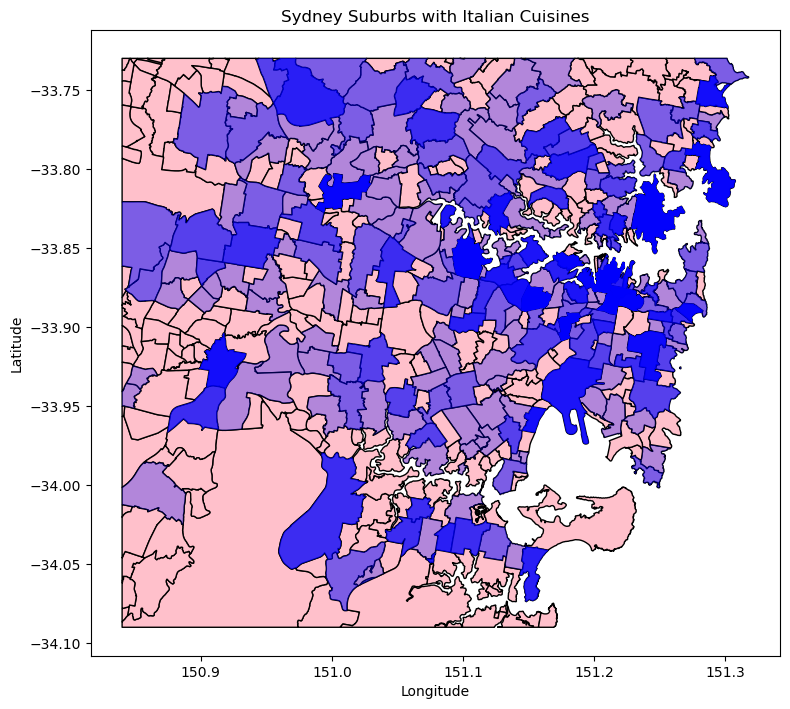

In [555]:
# Call the function to map the suburbs with density
show_cuisine_densitymap(cuisine_type)


##### This map shows the distribution of Italian restaurants in Sydney suburbs. The color of each suburb indicates the density of Italian restaurants in that area:

##### 1. Darker blue: Higher density of Italian restaurants
##### 2. Lighter blue: Lower density of Italian restaurants
##### 3. Pink: No Italian restaurants
##### 4. Based on the map, we can observe the following:

##### **Personal Opinion:**
##### The inner city suburbs have a high density of Italian restaurants, particularly around the CBD and the eastern suburbs.The western suburbs have a lower density of Italian restaurants, with some pockets of higher density.The northern and southern suburbs have a relatively low density of Italian restaurants.
##### Overall, the map suggests that Italian restaurants are concentrated in the inner city and eastern suburbs of Sydney. This may be due to a variety of factors, such as the historical presence of Italian immigrants in these areas, the higher population density, and the greater demand for Italian cuisine in these regions.

#### Question 4: Plotly
##### **Use Case: Analyzing Large Datasets** 
##### **Limitation of Non-Interactive Plotting**: 
##### When visualizing large datasets using traditional non-interactive plotting libraries like Matplotlib or Seaborn, users often face several limitations:

##### 1. Static Visuals: Non-interactive plots are static, meaning once generated, users cannot explore or manipulate the data further. For example, they can't zoom in on specific areas of interest or hover over points to see detailed information.

##### 2. Overlapping Data Points: In dense scatter plots or bar charts, data points can overlap, making it difficult to discern individual values. This is particularly problematic when dealing with large datasets, where many points may cluster together.

##### 3. Limited Information Display: Non-interactive plots can only display a set amount of information at once. Users may want to see more data attributes or related data without generating multiple static plots.

##### 4. Inflexibility: Making changes to the plot requires regenerating the plot entirely. For example, if a user wants to filter the data or change the parameters, they must rerun the entire plotting code, which can be time-consuming.

##### **How Plotly Addresses These Limitations**
##### 1. Interactivity: Plotly allows users to interact with plots by zooming, panning, and hovering over data points to view additional information. This makes data exploration much more intuitive. For instance, when hovering over a point in a scatter plot, users can see exact values for multiple dimensions (like x, y, and z coordinates) at once.

##### 2. Dynamic Filtering: Plotly supports the creation of interactive dashboards where users can filter data dynamically. For example, users can add dropdowns or sliders to adjust the dataset displayed in real time, facilitating easier exploration of trends and patterns.

##### 3. Enhanced Data Representation: With Plotly, you can overlay multiple types of plots (scatter, line, bar, etc.) in one interactive visualization. This enables a richer storytelling experience, allowing users to comprehend complex data relationships more effectively.

##### 4. Customization Options: Plotly provides extensive customization options for users to modify plot aesthetics (colors, shapes, sizes) dynamically. Users can create tailored views of their data without regenerating the plot.

##### 5. Export and Share Options: Plotly visualizations can be easily shared or embedded in web applications, making it convenient for collaborative analysis. Interactive plots can be saved as HTML files, allowing others to explore the data without needing to install any software.